In [59]:
import os

def locate_mri_data(file_extensions=None, keywords=None):
    """
    automatically locate MRI data files in the current directory.

    """

    # get the directory where the current Python file is located
    current_dir = os.path.dirname(os.path.abspath('jiayi_home_assignment'))

    # find file extensions for MRI files
    if file_extensions is None:
        file_extensions = ['.nii']

    # find keywords to search for in file names
    if keywords is None:
        keywords = ['anatomical', 'uniformity']

    # match files in the current directory
    matching_files = [
        os.path.join(current_dir, file)
        for file in os.listdir(current_dir)
        if any(file.endswith(ext) for ext in file_extensions) and
           any(keyword.lower() in file.lower() for keyword in keywords)
    ]

    return matching_files




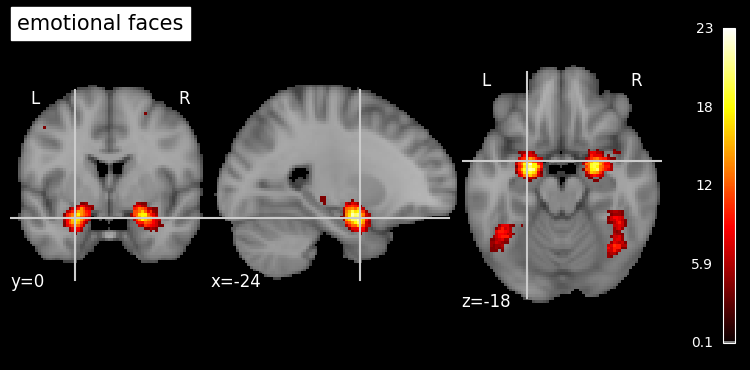

In [61]:
from nilearn import plotting
from nilearn import image

tstat_scan = locate_mri_data(keywords = ['uniformity']) # find the 'uniformity' file

plotting.plot_stat_map(tstat_scan[0], title="emotional faces", cmap ="hot", threshold=0.1, cut_coords=(-24,0,-18), bg_img=anatomical_scan[0]) # plot the anatomical scan for emotional faces

plotting.show()

Text(0, 0.5, 'Frequency of voxel')

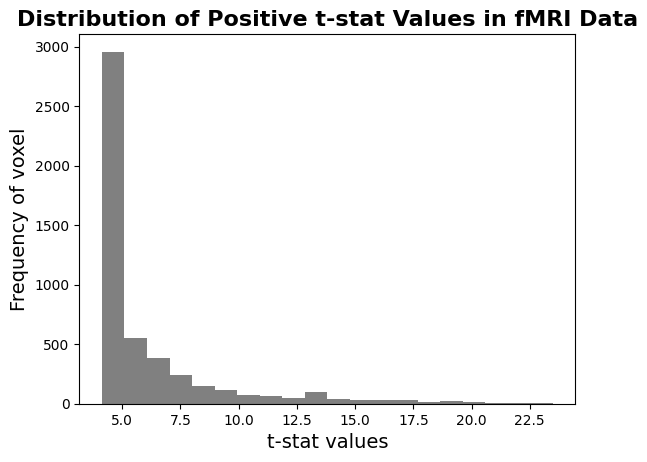

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


functional_data = locate_mri_data(keywords=['uniformity']) 

img = nib.load(functional_data[0])

# extract data
data = img.get_fdata()  

# make the data into 1D array
data_flat = data.flatten()

# select only positive values (>0)
positive_values = data_flat[data_flat > 0]

# plot the histogram
plt.hist(positive_values, bins=20, color='gray')  # Histogram with gray color
plt.title('Distribution of Positive t-stat Values in fMRI Data', fontsize=16, fontweight='bold')  # title
plt.xlabel('t-stat values', fontsize=14)  # X-axis label
plt.ylabel('Frequency of voxel', fontsize=14)  # Y-axis label

